In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from tools import *
from sklearn.preprocessing import MinMaxScaler

c:\Users\benjo\anaconda3\envs\lipreadGPU\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data_raw = read_merged_data()

Opening UoB_Set01_2025-01-02tapes.csv


c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19\tools.py:218: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_bids_asks = df_bids_asks.applymap(lambda x: x[1:-1].replace(",","") if isinstance(x, str) else "")


In [4]:
data_raw[0]

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,alpha,beta,LOB,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price
combined_time,,,,,,,,,,,,,
2025-01-02 08:00:00,[1 6],,,,NaN,NaN,"[['bid', [[1, 6]]], ['ask', []]]",NaN,NaN,1.0,NaN,NaN,NaN
2025-01-02 08:00:01,[261 1],[800 1][799 1][798 1][797 1],,[800 1][799 1][798 1],0.002986,0.015020,"[['bid', [[261, 1], [1, 6]]], ['ask', [[797, 1...",529.0,797.0,261.0,NaN,NaN,NaN
2025-01-02 08:00:02,[262 6],[338 3][297 5],[1 6],,0.238553,0.165031,"[['bid', [[262, 6], [261, 1]]], ['ask', [[297,...",279.5,297.0,262.0,NaN,NaN,NaN
2025-01-02 08:00:03,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],0.524854,0.429582,"[['bid', [[264, 6], [261, 1]]], ['ask', [[291,...",277.5,291.0,264.0,NaN,NaN,NaN
2025-01-02 08:00:04,,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,0.820913,0.541382,"[['bid', [[264, 6], [261, 1]]], ['ask', [[286,...",275.0,286.0,264.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-02 16:29:55,[284 2][275 1] [274 1][270 1][285 2][267 1][15...,[336 5][406 5][401 5][344 5][486 3][295 6],[283 2][275 2][133 9][275 1][284 2][270 1][72 1],[446 4][614 5][336 5][406 5][761 3][295 5],1.173264,2.413963,"[['bid', [[285, 2], [280, 4], [274, 1], [268, ...",285.5,286.0,285.0,0.0,NaN,285.333333
2025-01-02 16:29:56,[272 1][267 5][176 1][66 2][217 1][276 4],[295 3][459 5][492 5][296 1],[274 1][268 4] [267 1][285 2][159 1][176 1][28...,[295 6][344 5][286 1][459 5],0.667473,1.517056,"[['bid', [[276, 4], [272, 1], [267, 5], [262, ...",285.5,295.0,276.0,1.0,286.0,286.000000
2025-01-02 16:29:57,[65 5][80 4][277 1][276 8][269 1] [267 4][278 ...,[290 5][291 2] [295 1][789 5][496 3][290 2][28...,[262 5][276 4] [80 4][267 5][277 1][65 5][66 2...,[492 5][295 3][290 5][486 3][291 2][290 2][496...,0.769691,1.385548,"[['bid', [[280, 1], [279, 1], [276, 8], [272, ...",283.5,287.0,280.0,0.0,NaN,286.000000


In [5]:
data = pd.DataFrame(data_raw[0])
# remove rows where last tapes price is nan
data = data.dropna(subset=["Last Tapes Price"])
# only include last tapes price column
data = data[["Last Tapes Price"]]
data = data.resample('1min').mean()

In [6]:

data_scaled = data.copy()
# resample to 1 min

scaler = MinMaxScaler(feature_range=(0,1))
# scale last tapes price
data_scaled["Last Tapes Price"] = scaler.fit_transform(data["Last Tapes Price"].values.reshape(-1,1))

# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len]
test_data = data[training_data_len:]
train_scaled_data = data_scaled[:training_data_len]
test_scaled_data = data_scaled[training_data_len:]
print(len(train_data), len(test_data))

 # Selecting tapes Price values
dataset_train = train_scaled_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
scaled_train = np.reshape(dataset_train, (-1,1)) 

# Selecting tapes Price values
dataset_test = test_scaled_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
scaled_test = np.reshape(dataset_test, (-1,1))  


408 102


In [7]:
window = 60
X_train = []
y_train = []
for i in range(window, len(scaled_train)):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

X_test = []
y_test = []
for i in range(window, len(scaled_test)):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i, 0])

# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

[array([0.2611563 , 0.185153  , 0.26412209, 0.24063638, 0.256459  ,
       0.22110088, 0.17830432, 0.22283338, 0.21231353, 0.25149168,
       0.29738634, 0.26301909, 0.21514268, 0.15886498, 0.13153464,
       0.16526334, 0.14408027, 0.22503091, 0.21272924, 0.21787731,
       0.21338764, 0.14535582, 0.14786291, 0.25696957, 0.16816025,
       0.14153043, 0.16015835, 0.09432717, 0.04586092, 0.08706334,
       0.11504827, 0.20394068, 0.27312607, 0.19458323, 0.0434609 ,
       0.14843133, 0.13970087, 0.2096337 , 0.20106803, 0.17410964,
       0.17882046, 0.13978341, 0.122771  , 0.19640562, 0.13174824,
       0.12165575, 0.18140325, 0.13832338, 0.12107241, 0.08650607,
       0.09399749, 0.05521823, 0.04587124, 0.        , 0.05526884,
       0.19263746, 0.17161457, 0.16946175, 0.16190787, 0.0888638 ])]
[0.12584273641931976]

[array([0.2611563 , 0.185153  , 0.26412209, 0.24063638, 0.256459  ,
       0.22110088, 0.17830432, 0.22283338, 0.21231353, 0.25149168,
       0.29738634, 0.26301909, 0.21

In [8]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics

In [9]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(window, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(window, 
                       return_sequences = False))
regressorLSTM.add(Dense(window/2))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
348/348 [==============================] - 20s 30ms/step - loss: 0.0081 - accuracy: 0.0029
Epoch 2/12
348/348 [==============================] - 10s 28ms/step - loss: 0.0042 - accuracy: 0.0029
Epoch 3/12
348/348 [==============================] - 10s 28ms/step - loss: 0.0049 - accuracy: 0.0029
Epoch 4/12
348/348 [==============================] - 10s 28ms/step - loss: 0.0041 - accuracy: 0.0029
Epoch 5/12
348/348 [==============================] - 10s 30ms/step - loss: 0.0042 - accuracy: 0.0029
Epoch 6/12
348/348 [==============================] - 10s 30ms/step - loss: 0.0041 - accuracy: 0.0029
Epoch 7/12
348/348 [==============================] - 10s 30ms/step - loss: 0.0042 - accuracy: 0.0029
Epoch 8/12
348/348 [==============================] - 10s 30ms/step - loss: 0.0036 - accuracy: 0.0029
Epoch 9/12
348/348 [==============================] - 10s 30ms/step - loss: 0.0038 - accuracy: 0.0029
Epoch 10/12
348/348 [==============================] - 10s 29ms/step - loss: 0.004

In [10]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM)

2/2 [==============================] - 2s 19ms/step


In [11]:
y_LSTM_train = regressorLSTM.predict(X_train)
y_train_LSTM_O = scaler.inverse_transform(y_LSTM_train)
y_train_O = scaler.inverse_transform(y_train)
print("LSTM MSE:", metrics.mean_squared_error(y_train_O, y_train_LSTM_O))

11/11 [==============================] - 0s 22ms/step
LSTM MSE: 9.041800876153678


In [12]:
y_test_O = scaler.inverse_transform(y_test)
print("LSTM MAE:", metrics.mean_absolute_error(y_test_O, y_LSTM_O))
print("LSTM MSE:", metrics.mean_squared_error(y_test_O, y_LSTM_O))


LSTM MAE: 2.6643463720246787
LSTM MSE: 10.387376447848547


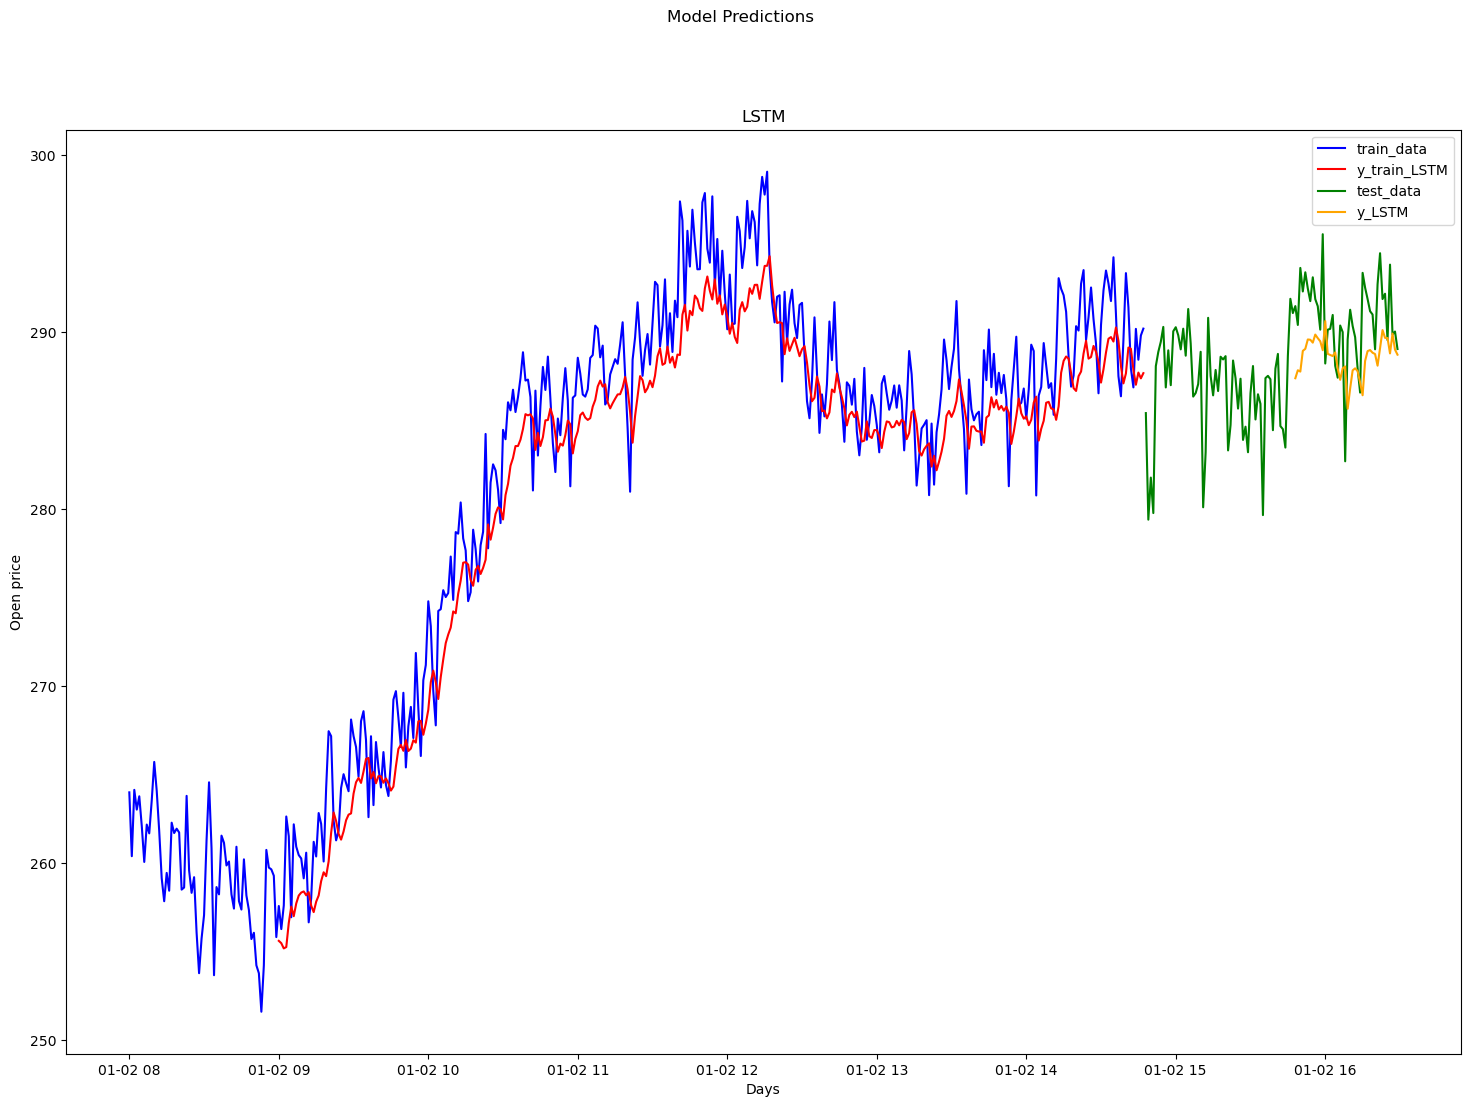

In [13]:
fig, axs = plt.subplots(1,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for LSTM predictions
axs.plot(train_data.index, train_data["Last Tapes Price"], label = "train_data", color = "b")
axs.plot(train_data.index[window:], y_train_LSTM_O[:], label = "y_train_LSTM", color = "r")
axs.plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs.plot(test_data.index[window:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs.legend()
axs.title.set_text("LSTM")

plt.xlabel("Days")
plt.ylabel("Price")
 
plt.show()

Stationary Predicted Count: 17
Stationary Actual Count: 3
Stationary Correct Count: 2
Upwards Predicted Count: 13
Upwards Actual Count: 14
Upwards Correct Count: 2
Downwards Predicted Count: 11
Downwards Actual Count: 24
Downwards Correct Count: 2
0.14634146341463414


<AxesSubplot: xlabel='combined_time'>

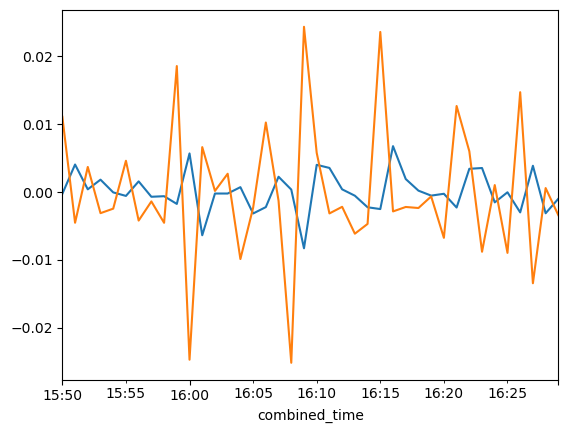

In [14]:
# check how many times signal has correctly predicted movement of actual price

# !!need to ensure that the price movement in in % values not absolute!!

# get actual price movement
actual_diff = test_data["Last Tapes Price"].pct_change().dropna()[window:]

pred = pd.DataFrame(y_LSTM_O, index = test_data.index[window:], columns = ["Last Tapes Price"])
diff = pred["Last Tapes Price"].pct_change().dropna()

threshold = 0.001 # 0.1% trading fee threshold

# check if both are over 1/100 of a % increase
up_correct = (diff>threshold) & (actual_diff>threshold)
down_correct = (diff<-threshold) & (actual_diff<-threshold)
stationary_correct = ((diff<=threshold) & (diff>-threshold)) & ((actual_diff<=threshold) & (actual_diff>-threshold))

print(f"Stationary Predicted Count: {sum((diff<=threshold) & (diff>-threshold))}")
print(f"Stationary Actual Count: {sum(((actual_diff<=threshold) & (actual_diff>-threshold)))}")
print(f"Stationary Correct Count: {sum(stationary_correct)}")

#correct = diff_high*actual_diff > 0 # correct if direction is the same
#print(f"Stationary Predicted Count: {sum(diff_high== 0)}")
#print(f"Stationary Actual Count: {sum(actual_diff== 0)}")
# must also check if both are zero
#correct = correct | (diff_high == 0) & (actual_diff == 0)

correct = up_correct | down_correct | stationary_correct
print(f"Upwards Predicted Count: {sum(diff>threshold)}")
print(f"Upwards Actual Count: {sum(actual_diff>threshold)}")
print(f"Upwards Correct Count: {sum(up_correct)}")
print(f"Downwards Predicted Count: {sum(diff<-threshold)}")
print(f"Downwards Actual Count: {sum(actual_diff<-threshold)}")
print(f"Downwards Correct Count: {sum(down_correct)}")
print(correct.sum()/len(correct))

diff[1:100].plot()  
actual_diff[1:100].plot()